In [1]:
import os
import sys

sys.path.append('..')

In [2]:
import numpy as np
import scikit_posthocs as sp # pip3 install scikit-posthocs
import scipy.stats as ss
import pandas as pd
from os import listdir
from autorank import autorank, create_report, plot_stats # pip3 install autorank
import matplotlib.pyplot as plt

#### get the data, combine different tables into 1 image-acc, 1 image-fpr, 1 rest-acc, 1 rest-fpr tables

In [3]:
files = np.array(listdir(os.path.join('..', 'tables')))
print(files)

['cifar10_resnet_5.xlsx' 'breastcancer_basic120_5.xlsx'
 'htru2_basic32_5.xlsx' 'cifar10_vgg_5.xlsx' 'breastcancer_svm_1.xlsx'
 'mnist_basic_5.xlsx' 'banknote_basic16_5.xlsx' 'htru2_svm_1.xlsx'
 'banknote_svm_1.xlsx']


In [4]:
files_image = [f for f in files if 'cifar' in f or 'mnist' in f]
files_num_nn = [f for f in files if 'banknote_basic' in f or 'breastcancer_basic' in f or 'htru2_basic' in f]
print(files_image)
print(files_num_nn)

['cifar10_resnet_5.xlsx', 'cifar10_vgg_5.xlsx', 'mnist_basic_5.xlsx']
['breastcancer_basic120_5.xlsx', 'htru2_basic32_5.xlsx', 'banknote_basic16_5.xlsx']


In [5]:
# combine non-image results
# ATTENTION: this includes only the non-svm results as the others haven't been defended with LID!
dfs_acc = []
dfs_fpr = []
for f in files_num_nn:
    df = pd.read_excel(os.path.join('..', 'tables', f), engine='openpyxl', header=1)
    df = df.drop(0)
    dfs_acc.append(df.iloc[:,2:6])
    dfs_fpr.append(df.iloc[:,6:])
res_acc_rest = pd.concat(dfs_acc)
# if you want to rename the columns so it looks better in the plot
res_acc_rest.columns = ['BAARD_2stage', 'BAARD_3stage', 'LID', 'RC'] 
res_fpr_rest = pd.concat(dfs_fpr)
res_fpr_rest.columns = res_acc_rest.columns

In [6]:
# here are the SVM results
files_rest_svm = [f for f in files if 'banknote_svm' in f or 'breastcancer_svm' in f or 'htru2_svm' in f]
dfs_acc = []
dfs_fpr = []
for f in files_rest_svm:
    df = pd.read_excel(os.path.join('..', 'tables', f), engine='openpyxl', header=1)
    df = df.drop(0)
    dfs_acc.append(df.iloc[:,2:5])
    dfs_fpr.append(df.iloc[:,5:])
res_acc_rest_svm = pd.concat(dfs_acc)
# if you want to rename the columns so it looks better in the plot
res_acc_rest_svm.columns = ['BAARD_2stage', 'BAARD_3stage', 'RC'] 
res_fpr_rest_svm = pd.concat(dfs_fpr)
res_fpr_rest_svm.columns = res_acc_rest_svm.columns

In [7]:
# combine image results
dfs_acc = []
dfs_fpr = []
for f in files_image:
    df = pd.read_excel(os.path.join('..', 'tables', f), engine='openpyxl', header=1)
    df = df.drop(0)
    dfs_acc.append(df.iloc[:,2:8])
    dfs_fpr.append(df.iloc[:,8:])
res_acc_img = pd.concat(dfs_acc)
# if you want to rename the columns so it looks better in the plot
res_acc_img.columns = ['BAARD_2stage', 'BAARD_3stage', 'FS', 'LID', "Magnet", 'RC'] 
res_fpr_img = pd.concat(dfs_fpr)
res_fpr_img.columns = res_acc_img.columns

In [15]:
dfs_acc[0]

,baard_2stage,baard_3stage,fs,lid,magnet,rc
1,13.3,29.0,69.7,0.5,30.2,0.5
2,63.0,65.9,2.3,15.4,8.0,0.0
3,99.9,99.9,0.3,19.4,99.3,0.0
4,100.0,100.0,0.2,6.4,100.0,0.0
5,100.0,100.0,0.7,1.5,100.0,0.0
6,11.4,25.8,60.9,8.3,23.5,0.2
7,13.6,26.2,44.9,0.0,17.8,0.0
8,15.9,28.4,27.8,0.0,12.2,0.0
9,20.9,30.3,9.2,0.0,10.2,0.0
10,9.4,19.4,1.8,75.1,82.1,94.8


#### Run autorank for each of them to get the plots

In [8]:
results_acc_img = autorank(res_acc_img)
results_fpr_img = autorank(res_fpr_img)
results_acc_rest = autorank(res_acc_rest)
results_fpr_rest = autorank(res_fpr_rest)
results_acc_rest_svm = autorank(res_acc_rest_svm)
results_fpr_rest_svm = autorank(res_fpr_rest_svm)

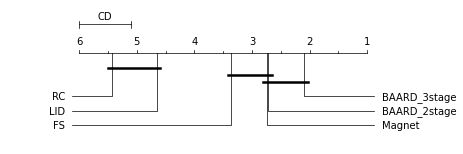

In [9]:
# accuracy for image datasets
plot_stats(results_acc_img)
plt.savefig('Nemenyi_ACC_imageData.pdf', format='pdf', dpi=1200, bbox_inches='tight')
#create_report(results_acc_img)

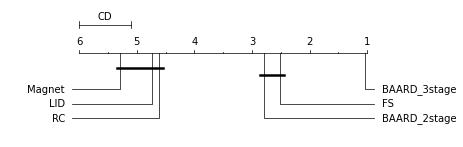

In [10]:
# FPR for image datasets
plot_stats(results_fpr_img)
plt.savefig('Nemenyi_FPR_imageData.pdf', format='pdf', dpi=1200, bbox_inches='tight')
#create_report(results_fpr_img)

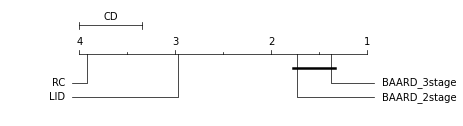

In [11]:
# accuracy for non-image datasets
plot_stats(results_acc_rest)
plt.savefig('Nemenyi_ACC_nonImageData.pdf', format='pdf', dpi=1200, bbox_inches='tight')
#create_report(results_acc_rest)

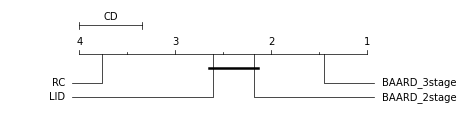

In [12]:
# FPR for non-image datasets
plot_stats(results_fpr_rest)
plt.savefig('Nemenyi_FPR_nonImageData.pdf', format='pdf', dpi=1200, bbox_inches='tight')
#create_report(results_fpr_rest)

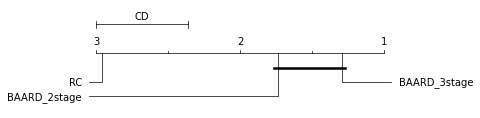

In [13]:
# accuracy for non-image datasets (here are the SVM results!)
plot_stats(results_acc_rest_svm)
plt.savefig('Nemenyi_ACC_nonImageData_svm.pdf', format='pdf', dpi=1200, bbox_inches='tight')
#create_report(results_acc_rest_svm)

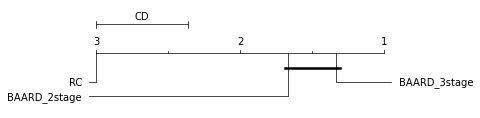

In [14]:
results_fpr_rest_svm
plot_stats(results_fpr_rest_svm)
plt.savefig('Nemenyi_FPR_nonImageData_svm.pdf', format='pdf', dpi=1200, bbox_inches='tight')